In [1]:
import sklearn.datasets as sd
import sklearn.utils as su
import sklearn.metrics as sm
import sklearn.model_selection as ms

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
iris = sd.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [18]:
data.groupby('target').agg([np.max, np.min])

sepal length (cm)      sepal width (cm)      petal length (cm)       \
                    amax amin             amax amin              amax amin   
target                                                                       
0                    5.8  4.3              4.4  2.3               1.9  1.0   
1                    7.0  4.9              3.4  2.0               5.1  3.0   
2                    7.9  4.9              3.8  2.2               6.9  4.5   

       petal width (cm)       
                   amax amin  
target                        
0                   0.6  0.1  
1                   1.8  1.0  
2                   2.5  1.4

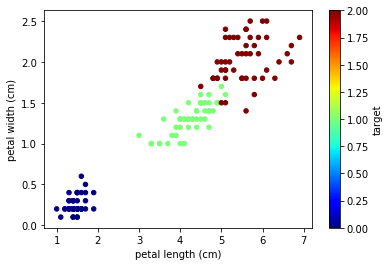

In [20]:
data.plot.scatter(x='petal length (cm)',
                  y='petal width (cm)',
                  c='target',
                  cmap='jet')

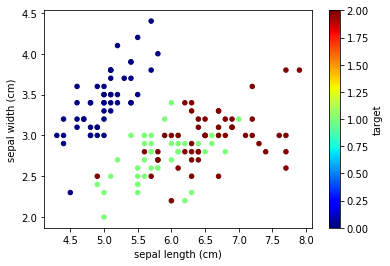

In [21]:
data.plot.scatter(x='sepal length (cm)',
                  y='sepal width (cm)',
                  c='target',
                  cmap='jet')

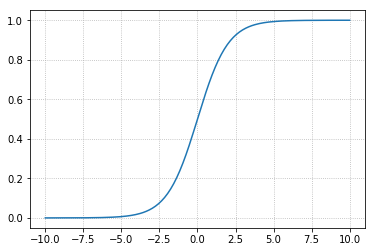

In [36]:
# 绘制sigmoid图像
x = np.linspace(-10, 10, 200)
y = 1 / (1 + np.exp(-x))
plt.grid(ls=':')
plt.plot(x, y)

In [31]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = ms.train_test_split(X,
                                                       y,
                                                       test_size=0.1,
                                                       random_state=7)

import sklearn.linear_model as lm
model = lm.LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

d:\program files (x86)\python 3.7\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\program files (x86)\python 3.7\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [32]:
print(sm.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.43      0.60         7
           2       0.43      1.00      0.60         3

    accuracy                           0.73        15
   macro avg       0.81      0.81      0.73        15
weighted avg       0.89      0.73      0.73        15



In [30]:
print(sm.confusion_matrix(y_test, predictions))

[[5 0 0]
 [0 6 0]
 [0 0 4]]
